# Laplace's equation

In [1]:
# Import libraries.
from matplotlib import pyplot, cm
from mpl_toolkits import mplot3d
import numpy

%matplotlib inline

In [2]:
# Change default font family and size for Matplotlib figures.
pyplot.rc('font', family='serif', size=16)

## Problem setup

Solve the Laplace's equation $\nabla^2 u = 0$ in the domain $\Omega = \left[ 0, L_x \right] \times \left[ 0, L_y \right]$

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

## Analytical solution

$$
u \left( x, y \right) = \frac{\sinh \left( \frac{3}{2} \pi \frac{y}{L_y} \right)}{\sinh \left( \frac{3}{2} \pi \frac{L_x}{L_y} \right)} \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)
$$

In [28]:
def laplace_solution(x, y, Lx, Ly):
    """Return the analytical solution.

    Parameters
    ----------
    x : numpy.ndarray
        Coordinates along the x direction as a 1D array of floats.
    y : numpy.ndarray
        Coordinates along the y direction as a 1D array of floats.
    Lx : float
        Length of the domain in the x direction.
    Ly : float
        Length of the domain in the y direction.

    Returns
    -------
    u : numpy.ndarray
        The analytical solution as a 2D array of floats.

    """
    # To do: Compute the analytical solution.
    X,Y = numpy.meshgrid(x,y)
    u = (numpy.sinh(1.5*numpy.pi*Y/Ly) / numpy.sinh(1.5*numpy.pi*Lx/Ly))*numpy.sin(1.5*numpy.pi*X/Lx)
    return u

In [29]:
def plot_3d(x, y, u, label='$z$', elev=30.0, azim=45.0):
    """Create a 3D surface plot of the scalar field `u`.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    u : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction; default: 'z'.
    elev : float, optional
        Elevation angle in the z plane; default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane; default: 45.0.

    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

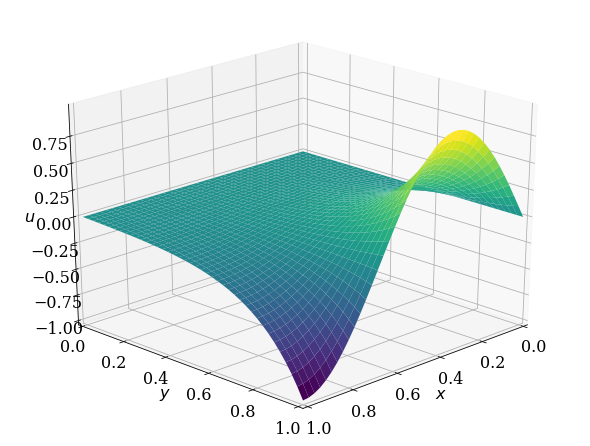

In [30]:
# Set parameters.
Lx, Ly = 1.0, 1.0  # lengths of the domain
nx, ny = 41, 41  # number of points along each direction

# Define grid-point locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)


# To do: Compute and plot the analytical solution.
u = laplace_solution(x,y, Lx, Ly)
plot_3d(x, y, u, label='$u$', elev=25.0, azim=45.0)

## Initial solution

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

Boundary values:

* Bottom and left: $u = 0$
* Top: $u = \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)$
* Right: $\frac{\partial u}{\partial x} = 0$

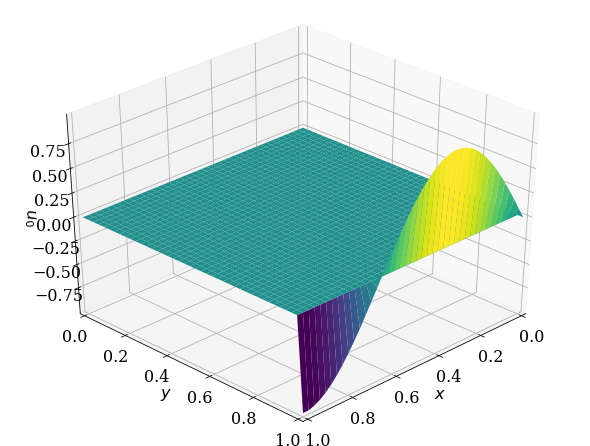

In [72]:
###
# To do: Set the initial guess `u0`.
u0 = numpy.zeros_like(u)
# Top boundary: Dirichlet
u0[-1,:] = numpy.sin(1.5*numpy.pi*x/Lx)
# Right boundary: Neumann, zero gradient
u0[:,-1] = u0[:,-2]

###
# To do: Plot the initial guess.
plot_3d(x, y, u0, label='$u_{0}$', elev=35.0, azim=45.0)

## Jacobi method

$$
u_{i, j}^{k+1} = \frac{1}{4} \left( u_{i, j-1}^k + u_{i-1, j}^k + u_{i+1, j}^k + u_{i, j+1}^k \right)
$$

In [73]:
def laplace_2d_jacobi(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations computed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        # To do: Update the solution using Jacobi method.
        u[1:-1,1:-1] = 0.25 *(un[1:-1,:-2]+un[:-2,1:-1]+un[2:,1:-1]+un[1:-1,2:])
        # To do: Update the value at boundaries (where necessary).
        # No need to update all conditions at the boundary because they are Dirichlet BCs
#         u[0,:] = 0.0
#         u[:,0] = 0.0
#         u[-1,:] = numpy.sin(1.5*numpy.pi*x/Lx)
        u[:,-1] = u[:,-2]
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        diff = numpy.linalg.norm(u-un)/numpy.linalg.norm(un)

    return u, ite, diff

Iterations needed 4473
Final residual 9.98996953047594e-09


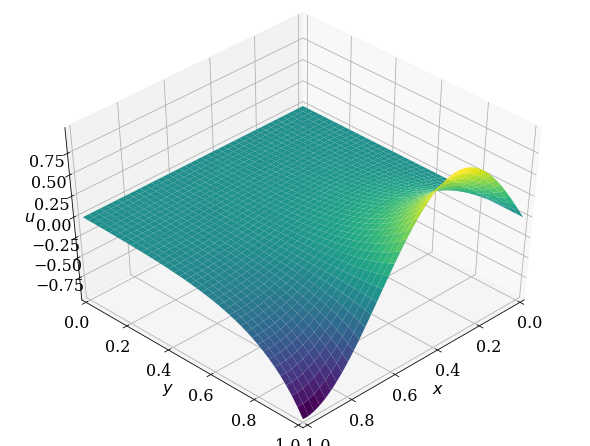

In [74]:
###
# To do: Compute the numerical solution of the Laplace equation.
u_lap, ite, diff = laplace_2d_jacobi(u0, maxiter=20000, rtol=1e-8)
# Question: How many iterations was needed?
print('Iterations needed', ite)
# Question: What's the value of the final residual?
print('Final residual', diff)

###
# To do: Plot the numerical solution.
plot_3d(x, y, u_lap, label='$u$', elev=45.0, azim=45.0)


## Convergence analysis

In [84]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    nx, ny = int(Lx/dx) + 1, int(Ly/dx) + 1
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    # To do: re-set the initial guess.
    u0 = numpy.zeros((nx,ny))
    # Top boundary: Dirichlet
    u0[-1,:] = numpy.sin(1.5*numpy.pi*x/Lx)
    # Right boundary: Neumann, zero gradient
    u0[:,-1] = u0[:,-2]
    # To do: Relax the solution with Jacobi.
    u_lap, ite, diff = laplace_2d_jacobi(u0, maxiter=20000, rtol=1e-8)
    # To do: Compute the analytical solution.
    u = laplace_solution(x,y, Lx, Ly)
    # To do: Compute and append the relative L2 error to `errors`.
    errors.append(numpy.linalg.norm(u_lap-u)/numpy.linalg.norm(u))
    ###
    print(nx, ite, diff)

11 402 9.910588887456817e-09
21 1374 9.966538637997457e-09
41 4473 9.98996953047594e-09
81 13669 9.998671359347556e-09


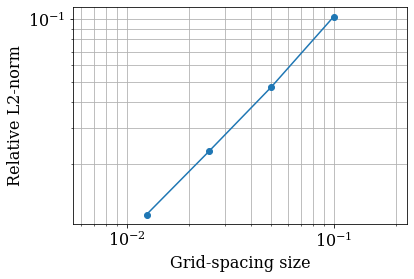

In [89]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
pyplot.figure()
pyplot.ylabel('Relative L2-norm')
pyplot.xlabel('Grid-spacing size')
pyplot.axis('equal')
pyplot.grid(which='both')
pyplot.loglog(dx_vals,errors, marker = 'o')
# Question: What's the order of convergence?
### First-order due to the first order discretization of the Neumann BC


## 2nd-order Neumann boundary conditions

In [95]:
def laplace_2d_jacobi_neumann(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Use a second-order approximation for Neumann boundary conditions.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        # To do: Update the solution using Jacobi method.
        u[1:-1,1:-1] = 0.25 *(un[1:-1,:-2]+un[:-2,1:-1]+un[2:,1:-1]+un[1:-1,2:])
        # To do: Update the value at boundaries (where necessary).
        u[1:-1, -1] = 0.25 * (2.0 * un[1:-1, -2] +
                              un[2:, -1] + un[:-2, -1])
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        diff = numpy.linalg.norm(u-un)/numpy.linalg.norm(un)       
        
    return u, ite, diff

## Re-do convergence analysis

In [96]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    nx, ny = int(Lx/dx) + 1, int(Ly/dx) + 1
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    # To do: re-set the initial guess.
    u0 = numpy.zeros((nx,ny))
    # Top boundary: Dirichlet
    u0[-1,:] = numpy.sin(1.5*numpy.pi*x/Lx)
    # Right boundary: Neumann, zero gradient
    u0[:,-1] = u0[:,-2]
    # To do: Relax the solution with Jacobi.
    u_lap, ite, diff = laplace_2d_jacobi_neumann(u0, maxiter=20000, rtol=1e-8)
    # To do: Compute the analytical solution.
    u = laplace_solution(x,y, Lx, Ly)
    # To do: Compute and append the relative L2 error to `errors`.
    errors.append(numpy.linalg.norm(u_lap-u)/numpy.linalg.norm(u))
    ###
    print(nx, ite, diff)
    

11 344 9.791213170425843e-09
21 946 9.99317469847619e-09
41 2453 9.994942200302221e-09
81 8661 9.99506356343287e-09


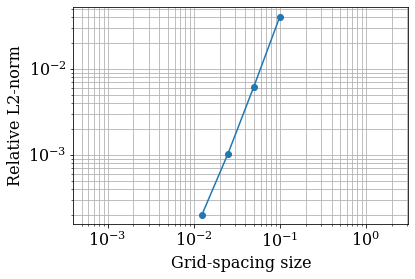

In [97]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
pyplot.figure()
pyplot.ylabel('Relative L2-norm')
pyplot.xlabel('Grid-spacing size')
pyplot.axis('equal')
pyplot.grid(which='both')
pyplot.loglog(dx_vals,errors, marker = 'o')

# Question: What's the order of convergence?
###
